# 1번

MOONS 데이터셋에서 다음 방법으로 분류해볼 것 

1) RBF, gamma=5, C=0.1

2) RBF, gamma=0.5, C=0.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import accuracy_score

def nameof(obj):
    for name in  globals() :
        if(globals()[name] is obj) : return name


#accuracy_score
def accuracy(clf):
    """accuracy_sore를 print하는 함수"""
    clf.fit(X_train, y_train )
    y_pred = clf.predict(X_test)
    print(nameof(clf),":",accuracy_score(y_test, y_pred)) 

    
X, y = make_moons(n_samples=500, noise=0.20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

# (1)
svm_clf1=SVC(kernel="rbf",gamma=5,C=0.1, random_state=42)
accuracy(svm_clf1)

# (2)
svm_clf2=SVC(kernel="rbf",gamma=0.5,C=0.1, random_state=42)
accuracy(svm_clf2)

svm_clf1 : 0.976
svm_clf2 : 0.888


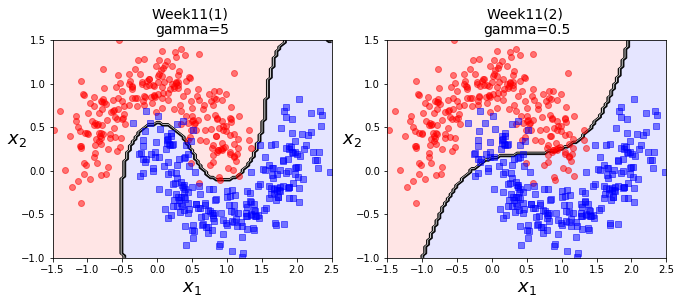

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5,2.5,-1,1.5], alpha=0.5, contour=True,title=None):
    width = np.linspace(axes[0], axes[1], 100)
    height = np.linspace(axes[2], axes[3], 100)
    
    x1, x2 = np.meshgrid(width, height)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#ffaaaa','#aaaaff'])
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#000000','#ffffff','#000000'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
        
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if title : plt.title(title,fontsize=14)


# 데이터 그리기
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_decision_boundary(svm_clf1, X, y, title='Week11(1) \ngamma=5')

plt.subplot(122)
plot_decision_boundary(svm_clf2, X, y, title='Week11(2) \ngamma=0.5')

plt.show()

# 2번

iris 데이터 셋에서 20%는 테스트셋으로 따로 두고 다음과 같은 SVM 분류기로 훈련셋트에서 훈련시킨 후 테스트해보세요.
(Cross Validation 사용하고 Sepal length와 Sepal width만 사용)

1) RBF 커널을 이용하고 gamma =0.7 , C= 1 일 때

2) 옵션 kernel=‘linear’ 이용하고 C=1 일 때

3) 옵션 kernel=‘poly’ 이용하고 degree=3, gamma=‘auto’, C=1

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [5]:
def nameof(obj):
    for name in  globals() :
        if(globals()[name] is obj) : return name

# accuracy of clf            
def accuracy(clf):
    clf.fit(X_train, y_train )
    y_pred = clf.predict(X_test)
    print(nameof(clf),":",accuracy_score(y_test, y_pred)) 
    
# data
iris = load_iris()
X,y  = iris.data[:,2:], iris.target

# (1)
svm_clf1 = SVC(kernel="rbf",gamma=0.7,C=1, random_state=42)
# (2)
svm_clf2 = SVC(kernel="linear",C=1, random_state=42)
# (3)
svm_clf3 = SVC(kernel="poly",degree=3 ,gamma="auto",C=1, random_state=42)

# 정확도 측정, 반복되는 코드 축약
for i in range(1,4):
    exec(f"y_pred{i}=cross_val_predict(svm_clf{i},X,y,cv=3);")
    exec(f"accuracy(svm_clf{i}); print(confusion_matrix(y,y_pred{i}))")
    print()


svm_clf1 : 0.968
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

svm_clf2 : 0.856
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

svm_clf3 : 0.832
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]



In [6]:
y_pred1=cross_val_predict(svm_clf1,X,y,cv=3)
y_pred2=cross_val_predict(svm_clf2,X,y,cv=3)
y_pred3=cross_val_predict(svm_clf3,X,y,cv=3)

accuracy(svm_clf1)
accuracy(svm_clf2)
accuracy(svm_clf3)

print(confusion_matrix(y,y_pred1))
print(confusion_matrix(y,y_pred2))
print(confusion_matrix(y,y_pred3))

svm_clf1 : 0.968
svm_clf2 : 0.856
svm_clf3 : 0.832
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
[[50  0  0]
 [ 0 48  2]
 [ 0  4 46]]
